# Python/Kerasで深層学習：MNISTを畳込み(CNN)で学習
https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3  
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 

Using TensorFlow backend.


In [2]:
'''MNISTデータをCNNで深層学習'''

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [3]:
# クラス数
num_classes = 10

# 入力画像の解像度
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first': # Theano
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # Tensorflow
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], '訓練データサイズ')
print(x_test.shape[0], 'テストデータサイズ')
print(input_shape)


x_train shape: (60000, 28, 28, 1)
60000 訓練データサイズ
10000 テストデータサイズ
(28, 28, 1)


In [4]:
# ワンホットベクトルに変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# DNNの定義
inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3),activation='relu') (inputs)
x = Conv2D(64, (3, 3), activation='relu') (x)
x = MaxPooling2D(pool_size=(2, 2)) (x)
x = Dropout(0.25) (x)
x = Flatten() (x)
x = Dense(128, activation='relu') (x)
x = Dropout(0.5) (x)
outputs = Dense(num_classes, activation='softmax') (x)

model = Model(inputs=[inputs], outputs=[outputs])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

In [6]:
# DNNモデルをJSONへ保存
json_str = model.to_json()
open('json/Python-MNIST-CNN.json','w').write(json_str)

3568

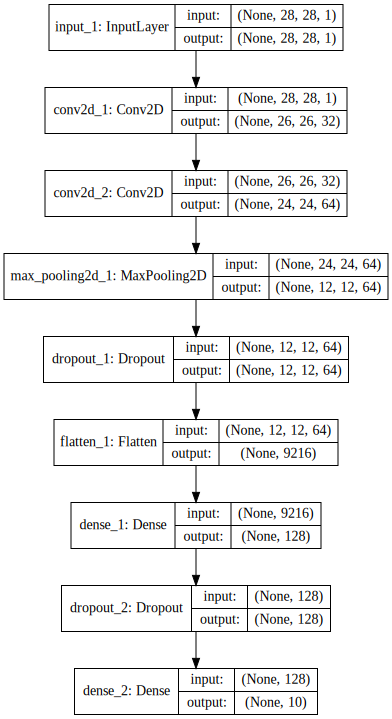

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='pdf/Python-MNIST-CNN.pdf') # 図の保存

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))



In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), # Adadeltaを最適化関数として採用
              metrics=['accuracy'])


In [9]:
epochs = 30
batch_size = 128

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2854 - acc: 0.9117 - val_loss: 0.0620 - val_acc: 0.9809
Epoch 2/30
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0912 - acc: 0.9735 - val_loss: 0.0437 - val_acc: 0.9861
Epoch 3/30
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0672 - acc: 0.9801 - val_loss: 0.0371 - val_acc: 0.9877
Epoch 4/30
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0541 - acc: 0.9835 - val_loss: 0.0333 - val_acc: 0.9892
Epoch 5/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0478 - acc: 0.9852 - val_loss: 0.0373 - val_acc: 0.9876
Epoch 6/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0338 - val_acc: 0.9888
Epoch 7/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0386 - acc: 0.9880 - val_loss: 0.0279 - val_acc

In [10]:
# HDF5ファイルでモデル全体とモデルの重みを保存
model.save("h5/PYTHON-MNIST-CNN.h5")
model.save_weights("h5/PYTHON-MNIST-CNN-weights.h5")

In [11]:
# pickleで訓練のヒストリーを保存
import pickle
with open('pkl/PYTHON-MNIST-CNN.pkl', 'wb') as h_file:
    pickle.dump(history.history, h_file)

In [12]:
pred = model.predict(x_test)

# 結果を表示
print("予測:\n", pred)


予測:
 [[1.9655111e-12 2.0298622e-11 4.4331698e-11 ... 1.0000000e+00
  2.8175690e-13 7.6341494e-10]
 [2.6908826e-09 5.7576915e-10 1.0000000e+00 ... 9.7087996e-16
  3.1532638e-14 3.3104826e-15]
 [1.9828865e-10 9.9999976e-01 5.9573424e-10 ... 7.8335056e-08
  1.2714197e-09 4.1147707e-11]
 ...
 [2.9322173e-17 4.9876298e-14 1.9186518e-15 ... 8.2900749e-11
  4.2287426e-10 2.5643643e-09]
 [9.0827370e-14 3.3247283e-14 7.0247147e-18 ... 1.6296911e-14
  3.9588418e-08 1.3440465e-15]
 [1.7616526e-10 3.4393204e-14 3.6868258e-11 ... 3.3584180e-18
  4.8155528e-13 1.2976882e-14]]


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('テストデータの損失:', score[0])
print('テストデータの精度:', score[1])


テストデータの損失: 0.028894929695862947
テストデータの精度: 0.9929


In [14]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


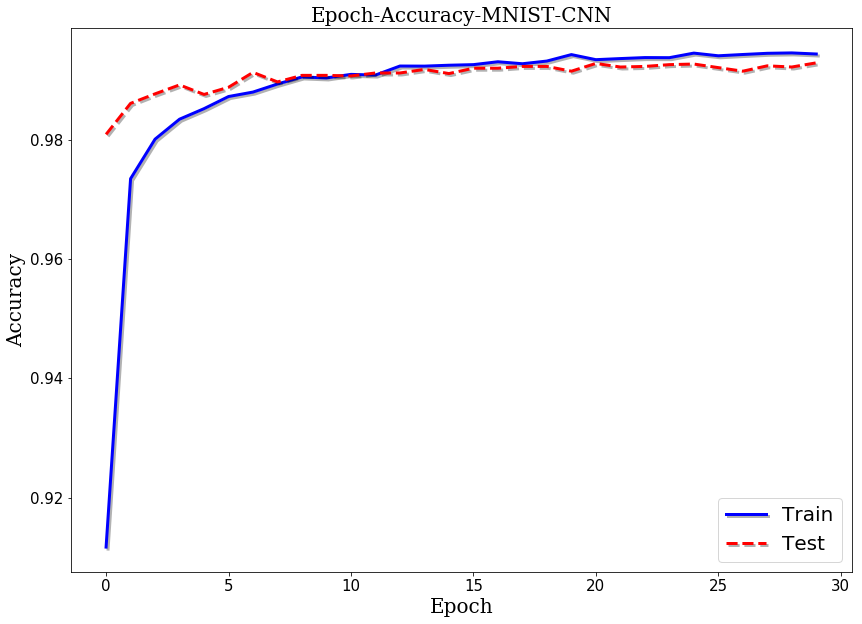

In [15]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-MNIST-CNN',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('pdf/Epoch-Accuracy-MNIST-CNN.pdf')
plt.show()


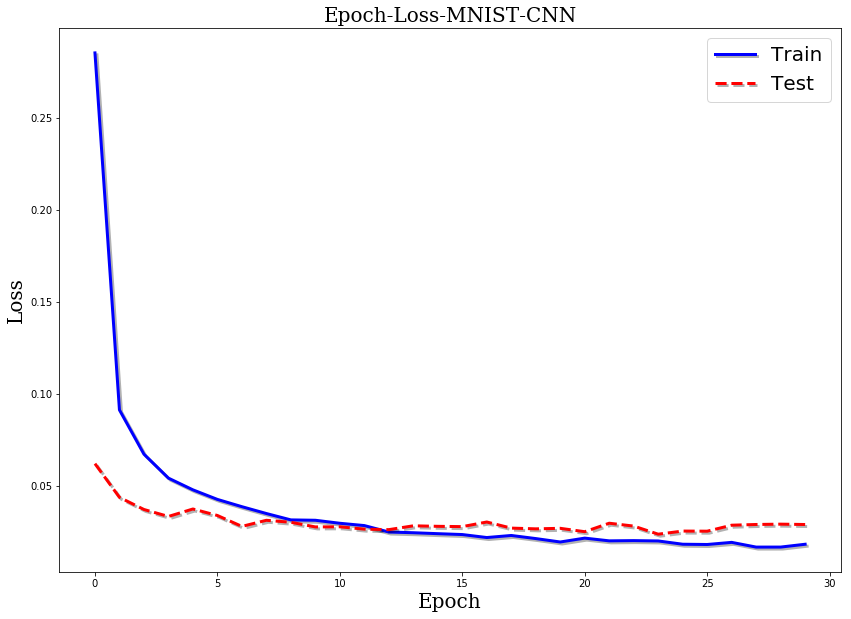

In [16]:
# 損失グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['loss'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_loss'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.title('Epoch-Loss-MNIST-CNN',fontsize=25,font_properties=fp2)
plt.ylabel('Loss',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)
plt.savefig('pdf/Epoch-Loss-MNIST-CNN.pdf')
plt.show()


In [17]:
# 未知データのクラスの予測
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


[7 2 1 ... 4 5 6]


In [18]:
# 混合行列の描画関数の定義
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

Confusion matrix, without normalization
[[ 977    1    2    0    0    2    4    0    4    2]
 [   0 1132    1    0    0    0    2    2    1    1]
 [   0    0 1024    2    0    0    0    3    1    0]
 [   0    0    0 1003    0    4    0    1    0    0]
 [   0    0    0    0  976    0    1    0    0    4]
 [   0    0    0    4    0  884    1    0    0    2]
 [   1    2    0    0    2    2  948    0    1    0]
 [   1    0    5    0    0    0    0 1021    0    1]
 [   1    0    0    1    2    0    2    1  966    1]
 [   0    0    0    0    2    0    0    0    1  998]]


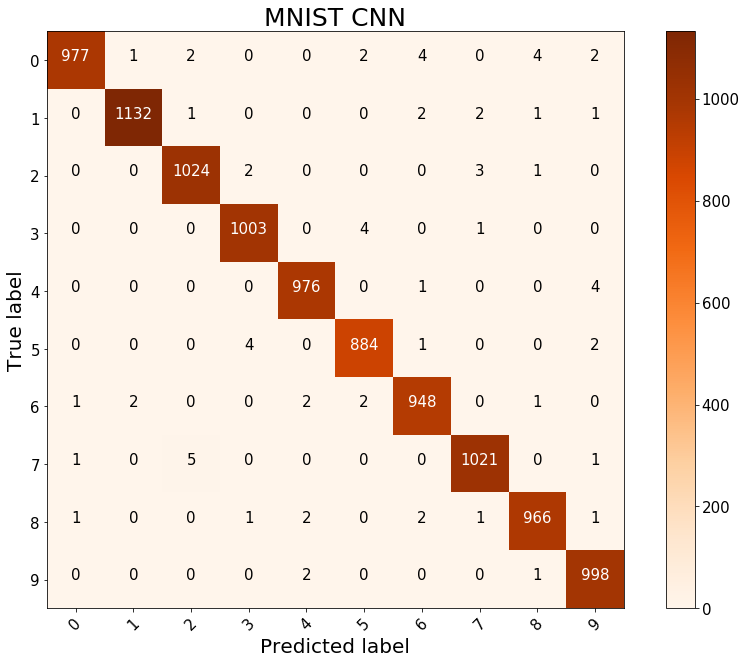

In [19]:
from sklearn.metrics import confusion_matrix # 混合行列
actual = np.argmax(y_test, axis=1)
cm = confusion_matrix(pred_classes, actual)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, classes=classes, title='MNIST CNN')
plt.show()


In [20]:
count = 0
total = actual.shape[0]
for i in range(total):
    if actual[i] == pred_classes[i]:
        count += 1
accuracy = float(count)/total
print("分類精度 = ",accuracy)


分類精度 =  0.9929
